In [11]:
import pandas as pd
import numpy as np
import string
import nltk
import tensorflow.keras as tf
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential

## Pobieranie danych i preprocessing 

In [12]:
data = pd.read_csv(r'C:\Users\obses\olympic-games-medals-19862018\sport-text-classification-ball-ISI-public\train\train.tsv', sep='\t', header=None)
polish_stopwords = pd.read_csv(r'C:\Users\obses\olympic-games-medals-19862018\sport-text-classification-ball-ISI-public\train\polish.stopwords.txt', header=None)

X_test = pd.read_csv(r'C:\Users\obses\olympic-games-medals-19862018\sport-text-classification-ball-ISI-public\dev-0\in.tsv', sep='\t', header=None)
Y_test = pd.read_csv(r'C:\Users\obses\olympic-games-medals-19862018\sport-text-classification-ball-ISI-public\dev-0\expected.tsv', sep='\t', header=None)
X_A_test = pd.read_csv(r'C:\Users\obses\olympic-games-medals-19862018\sport-text-classification-ball-ISI-public\test-A\in.tsv', sep='\t', header=None)

X_train = data[data.columns[1]]
Y_train = data[data.columns[0]]
X_A_test = X_A_test[X_A_test.columns[0]]

print(len(X_A_test))

X_test = X_test[X_test.columns[0]]
Y_test = Y_test[Y_test.columns[0]]

print(X_train[0], Y_train[0])
print(X_test[0], Y_test[0])

def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in polish_stopwords]
    return ' '.join(tokens)

X_train = X_train.apply(preprocess)
print(X_train.shape, type(X_train))

X_test = X_test.apply(preprocess)
print(X_test.shape, type(X_test))

X_A_test = X_A_test.apply(preprocess)
print(X_A_test.shape, type(X_A_test))

5447
Mindaugas Budzinauskas wierzy w odbudowę formy Kevina Johnsona. Czy ktoś opuści Polpharmę? Mindaugas Budzinauskas w rozmowie z WP SportoweFakty opowiada o transferze Kevina Johnsona, ewentualnych odejściach z Polpharmy i kolejnym meczu PLK z Anwilem. - Potrzebowaliśmy takiego gracza, jak Johnson - podkreśla szkoleniowiec starogardzian. 1
Mundial 2018. Były reprezentant Anglii trenerem Filipin Po niemal trzech latach przerwy Terry Butcher powraca na ławkę trenerską. Były obrońca reprezentacji Anglii został nowym selekcjonerem Filipin. 1
(98132,) <class 'pandas.core.series.Series'>
(5452,) <class 'pandas.core.series.Series'>
(5447,) <class 'pandas.core.series.Series'>


In [13]:
# Train the Word2Vec model
print(X_train[2])
sentences = [sentence.split() for sentence in X_train]
w2v_model = Word2Vec(sentences, window=5, min_count=5, workers=4)

fen 9 zapowiedź walki róża gumienna vs katarzyna posiadała wideo podczas fight exclusive night 9 zmierzą się również kobiety w walce pań na zasadach k1 rękawice skrzyżują róża gumienna i katarzyna posiadała


In [14]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(X_test)
tokenizer3 = Tokenizer()
tokenizer3.fit_on_texts(X_A_test)

In [15]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer2.texts_to_sequences(X_test)
X_A_test = tokenizer3.texts_to_sequences(X_A_test)
print(X_train[0])
print(X_test[0])

[4185, 4360, 1275, 1, 22420, 1084, 3211, 6765, 132, 2718, 1879, 5966, 4185, 4360, 1, 561, 2, 73, 88, 2322, 8, 3405, 3211, 6765, 17260, 44122, 2, 1950, 4, 541, 17, 195, 2, 2645, 12760, 1408, 3430, 31, 3076, 1607, 712, 11581]
[164, 27, 96, 364, 1368, 570, 6057, 9, 1124, 165, 386, 1125, 9744, 9745, 5092, 2, 6058, 14853, 96, 1369, 63, 1368, 58, 134, 4400, 6057]


In [16]:
vocab_size = len(tokenizer.word_index) + 1

In [17]:
# Pad the sequences to a fixed length
max_length = 100
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')
X_A_test = pad_sequences(X_A_test, maxlen=max_length, padding='post')
print(X_train[10])
print(X_test[10])

[  988  4063  1471   114     5  8198  7541     3   618 12447  4040   119
  1887   397  8988   228   326 13865 52570  4063  1783  7311    13     1
   190  1615    46    19    43  5467 12448     5     2  2167   464     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
[   4   90 1497  694   28    8  180    1 9758    1  105   87    5 1086
  420  297  694    4   21  369    1 3109  304  180   13   23 4407   28
    8 1271   87    5  817    1 9758    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0

In [18]:
# Create a weight matrix for the embedding layer
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(109453, 100)


In [19]:
from keras.initializers import Constant
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
model = Sequential()

# Define the model
model = Sequential()

# Embedding layer
model.add(Embedding(
    input_dim=vocab_size,
    output_dim=100,
    embeddings_initializer=Constant(embedding_matrix),
    input_length=max_length,
    trainable=True  # Allow fine-tuning of embeddings
))

# Add Convolutional layer
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5)) #

model.add(Conv1D(filters=128, kernel_size=5, activation='relu')) #
model.add(GlobalMaxPooling1D()) #
model.add(Dropout(0.5)) #

# Additional Dense layer with Dropout for regularization
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\obses\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [23]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(98132, 100) (98132,) (5452, 100) (5452,)


In [27]:
history = model.fit(X_train, Y_train, epochs=3, batch_size=4, validation_data=(X_test, Y_test) )

Epoch 1/3
24533/24533 ━━━━━━━━━━━━━━━━━━━━ 1753s 71ms/step - accuracy: 0.9830 - loss: 0.0604 - val_accuracy: 0.5477 - val_loss: 2.0434
Epoch 2/3
24533/24533 ━━━━━━━━━━━━━━━━━━━━ 1747s 71ms/step - accuracy: 0.9874 - loss: 0.0461 - val_accuracy: 0.5655 - val_loss: 1.8298
Epoch 3/3
24533/24533 ━━━━━━━━━━━━━━━━━━━━ 1740s 71ms/step - accuracy: 0.9894 - loss: 0.0409 - val_accuracy: 0.5921 - val_loss: 3.2375


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5817 - loss: 3.4503
Test Accuracy: 59.21%
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[1 0 1 ... 1 1 1]
[1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1]
0.5920763022743947


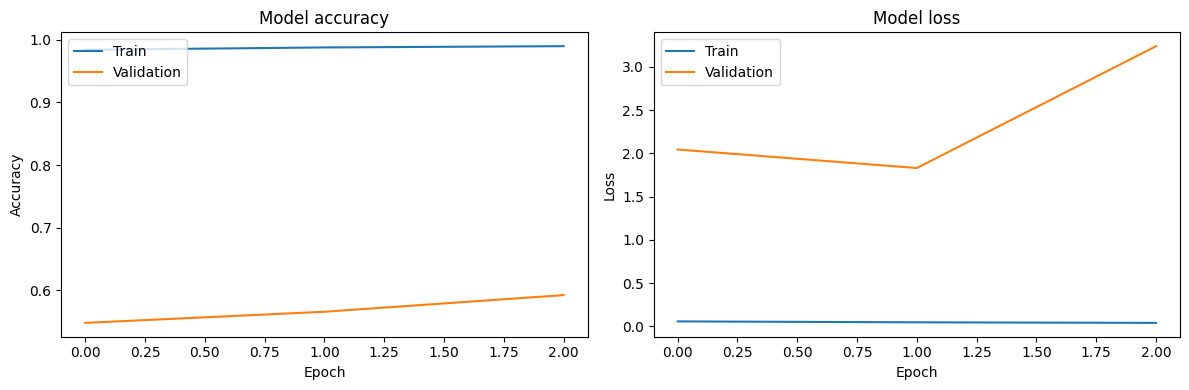

In [33]:
from sklearn import metrics
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')
predictions = model.predict(X_test)

binary_predictions = (predictions > 0.5).astype(int)

binary_predictions = binary_predictions.flatten()

print(binary_predictions)

print(binary_predictions[:20])
results = metrics.accuracy_score(Y_test, binary_predictions)
print(results)

# Plot training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [34]:
filename = "out.tsv"

# Open the file in write mode
with open(filename, 'w') as file:
    # Loop through each element in the array
    for value in binary_predictions:
        # Write each element on a new line
        file.write(f"{value}\n")

In [35]:
print(f"TSV file '{filename}' created successfully.")

TSV file 'out.tsv' created successfully.


In [36]:
predictions2 = model.predict(X_A_test)
print(len(X_A_test))
binary_predictions2 = (predictions2 > 0.5).astype(int)

binary_predictions2 = binary_predictions2.flatten()

print(binary_predictions2[:20], len(binary_predictions2))


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
5447
[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1] 5447


In [37]:
filename = "outA.tsv"

# Open the file in write mode
with open(filename, 'w') as file:
    # Loop through each element in the array
    for value in binary_predictions2:
        # Write each element on a new line
        file.write(f"{value}\n")